### Техническое задание

Выполнение тестового задания для ООО Авангард на вакансию дата аналитик 

**Задание 1**

 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
 
 б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
 
 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

 Подгруппа – Sub-Category
 Дата – Order_date
 Сделать вывод на основе полученных результатов.

 **Задание 2**
 Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

 **Задание 3**
 Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

 Замечания: Работу лучше выполнить в jupyter и там же написать выводы по каждому заданию. После выполнения загрузите код на github.

### Импорт библиотек и онбординг

In [199]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [50]:
url = 'https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/export?format=csv&gid=1477722452'

In [51]:
df = pd.read_csv(url)

In [52]:
def total_info(data):
    print('Ознакомление с датафреймом')
    print('')
    
    
    display(data.head())
    print('Получены первые 5 строк датафрейма')
    print('')
    
    size = 'Общее количество столбцов в датафрейме: {cols} Количество строк в датафрейме {rows}'
    size = size.format(cols = data.shape[1], rows = data.shape[0])
    print(size)
    print('')
    
    print(data.info())
    print('Получена основная информация о датафрейме')
    print('')
    
    missing_counts = data.isnull().sum()
    missing_percentage = round((data.isnull().sum() / len(data)) * 100,2)
    result_df = pd.DataFrame({'Количество пропусков': missing_counts, 'Процент пропусков': missing_percentage})
    result_df.index.name = 'Название столбца'
    result_df = result_df[result_df['Количество пропусков'] > 0]
    print('Датафрейм со столбцами, содержащими пропуски:')
    display(result_df.reset_index())
    print('')
    
    duplicated = 'Количество полностью дублирующихся строк: {duplicate} \nВ процентах {percent}'
    duplicated = duplicated.format(duplicate = data.duplicated().sum(),\
                                   percent = round(data.duplicated().sum() / data.shape[0] * 100,3))
    print(duplicated)

In [53]:
total_info(df)

Ознакомление с датафреймом



,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


Получены первые 5 строк датафрейма

Общее количество столбцов в датафрейме: 6 Количество строк в датафрейме 9800

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB
None
Получена основная информация о датафрейме

Датафрейм со столбцами, содержащими пропуски:


,Название столбца,Количество пропусков,Процент пропусков



Количество полностью дублирующихся строк: 0 
В процентах 0.0


После онбординга с датафреймом выявлено:
    
    - Датасет включает 9800 строк и 6 столбцов
    - Названия столбцов не приведены к змеиному регистру
    - Тип данных некоторых столбцов несоответствует хранящимся в нем данным
    - В датасете нет пропущенных значений или явных дубликатов

### Предобработка данных

#### Ренейм столбцов

In [55]:
df.columns

Index(['ID', 'Order Date', 'Class', 'Region', 'Sub-Category', 'Sales'], dtype='object', name='Название столбца')

In [56]:
df = df.rename(columns = {'ID':'id',
                          'Order Date': 'order_date', 
                          'Class' : 'class',
                          'Region' : 'region',
                          'Sub-Category' : 'sub_category',
                          'Sales' : 'sales'})

In [57]:
df.head()

Название столбца,id,order_date,class,region,sub_category,sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


Названия столбцов приобрели змеиный регистр

#### Коррекция типов данных столбцов и хранящейся в них информации

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            9800 non-null   int64 
 1   order_date    9800 non-null   object
 2   class         9800 non-null   object
 3   region        9800 non-null   object
 4   sub_category  9800 non-null   object
 5   sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


In [63]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')
df['sales'] = df['sales'].str.replace(',', '.').astype(float)

In [65]:
df.dtypes

Название столбца
id                       int64
order_date      datetime64[ns]
class                   object
region                  object
sub_category            object
sales                  float64
dtype: object

- Столбец order_date скорректирован и теперь хранит данные типа datetime64
- Столбец sales так же изменен со строки на float64

#### Проверка на наличие неявных дубликатов

In [66]:
print(df['region'].value_counts())
print('-----------')
print(df['class'].value_counts())
print('-----------')
print(df['sub_category'].value_counts())

region
Калиниград     3140
Владивосток    2785
Урал           2277
Москва         1598
Name: count, dtype: int64
-----------
class
Стандарт        5859
Второй класс    1902
Первый класс    1501
Same Day         538
Name: count, dtype: int64
-----------
sub_category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


Неявных дубликатов необнаружено

#### Резюме предобработки

- Столбцы приведены в змеиный регистр
- Изменены типы данных некоторых столбцов
- Выполнена перепроверка на наличие неявных дубликатов

### Анализ данных

#### Задание 1

In [124]:
df.sample(5)

Название столбца,id,order_date,class,region,sub_category,sales
5887,471,2016-12-20,Стандарт,Владивосток,Paper,17786.73
2427,6045,2018-05-19,Второй класс,Москва,Paper,24048.86
4314,7388,2017-09-13,Стандарт,Урал,Furnishings,44557.04
3236,4937,2018-01-06,Стандарт,Москва,Binders,33249.43
4708,3580,2017-07-25,Стандарт,Москва,Paper,22319.52


##### Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [125]:
df_orders = df.groupby('sub_category', as_index = False).agg({'order_date':'count'})\
                                            .sort_values('order_date', ascending = False)\
                                            .rename(columns = {'order_date':'orders_number'})

In [126]:
df_orders.head(5)

Название столбца,sub_category,orders_number
3,Binders,1492
12,Paper,1338
9,Furnishings,931
13,Phones,876
14,Storage,832


Выделены топ 5 субкатегорий с наибольшим количеством заказов за все время

#### Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?


In [127]:
df.order_date.max()

Timestamp('2018-12-30 00:00:00')

Последняя дата в исследуемых данных '2018-12-30', чтобы посмотреть какие подгрупны товаров наиболее часто покупали за последние два года нужно исходной датой взять '2016-12-30'

In [128]:
df_last_two_years = df.query('order_date > "2016-12-30"').groupby('sub_category', as_index = False).agg({'order_date':'count'})\
                                            .sort_values('order_date', ascending = False)\
                                            .rename(columns = {'order_date':'orders_number_last_two_years'})

In [129]:
df_last_two_years.head(5)

Название столбца,sub_category,orders_number_last_two_years
3,Binders,907
12,Paper,809
9,Furnishings,558
13,Phones,510
14,Storage,491


Выделены топ 5 субкатегорий с наибольшим количеством заказов за последние 2 года исследуемых данных

##### Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)

In [130]:
df_last_year  = df.query('order_date > "2017-12-30"').groupby('sub_category', as_index = False).agg({'order_date':'count'})\
                                            .sort_values('order_date', ascending = False)\
                                            .rename(columns = {'order_date':'orders_number_last_year'})

In [131]:
df_last_year.head(5)

Название столбца,sub_category,orders_number_last_year
3,Binders,494
12,Paper,453
9,Furnishings,310
13,Phones,291
14,Storage,282


Выделены топ 5 субкатегорий с наибольшим количеством заказов за последний год исследуемых данных


##### Вывод по заданию 1

Во всех 3 исследуемых периодах субкатегории с наивысшим числом заказов совпадают, топ 5 всключает в себя: 'Binders', 'Paper', 'Furnishings', 'Phones', 'Storage'

In [158]:
pivot_table = (pd.merge(df_orders, df_last_year, on='sub_category', how='outer')
               .merge(df_last_two_years, on='sub_category', how='outer'))

Мердж всех 3 датасетов для получения финального датасета

In [266]:
sub_categories_of_interest = ['Binders', 'Paper', 'Furnishings', 'Phones', 'Storage']
top_5_pivot_table = pivot_table[pivot_table['sub_category'].isin(sub_categories_of_interest)]
top_5_pivot_table.sort_values('orders_number',ascending = False)

Название столбца,sub_category,orders_number,orders_number_last_year,orders_number_last_two_years
3,Binders,1492,494,907
12,Paper,1338,453,809
9,Furnishings,931,310,558
13,Phones,876,291,510
14,Storage,832,282,491


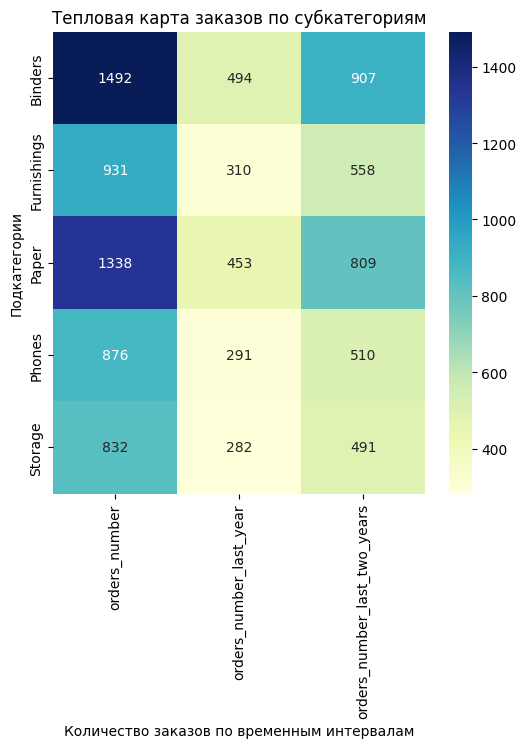

In [299]:
df_heatmap = top_5_pivot_table.set_index('sub_category')
plt.figure(figsize=(6, 6))
sns.heatmap(df_heatmap, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Количество заказов по временным интервалам')
plt.ylabel('Подкатегории')
plt.title('Тепловая карта заказов по субкатегориям')
plt.show()

На тепловой карте отмечено количество заказов в разных субкатегориях в разбивке по временным периодам

#### Дополнение: какой процент от всех заказов составляют заказы данных топ 5 категорий за все время

In [163]:
all_orders = df.order_date.count()
all_orders

9800

In [171]:
df_copy = top_5_pivot_table.copy()

df_copy['percentage_of_total_orders'] = df_copy['orders_number'].apply(lambda x:round((x / all_orders) * 100, 2))

df_copy

Название столбца,sub_category,orders_number,orders_number_last_year,orders_number_last_two_years,percentage_of_total_orders
3,Binders,1492,494,907,15.22
9,Furnishings,931,310,558,9.50
12,Paper,1338,453,809,13.65
13,Phones,876,291,510,8.94
14,Storage,832,282,491,8.49


Создан столбец с данными, которые являются процентом заказов топ 5 субкатегорий за все время от общего числа заказов 

#### Задание 2  Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).


In [173]:
all_sales = df.sales.sum()
all_sales

224633225.818

In [191]:
df.describe()

Название столбца,id,order_date,sales
count,9800.000000,9800,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469184,22921.757737
min,1.000000,2015-01-03 00:00:00,1002.794000
25%,2450.750000,2016-05-24 00:00:00,12135.625000
50%,4900.500000,2017-06-26 00:00:00,22882.060000
75%,7350.250000,2018-05-15 00:00:00,33730.130000
max,9800.000000,2018-12-30 00:00:00,44995.410000
std,2829.160653,NaN,12601.999815


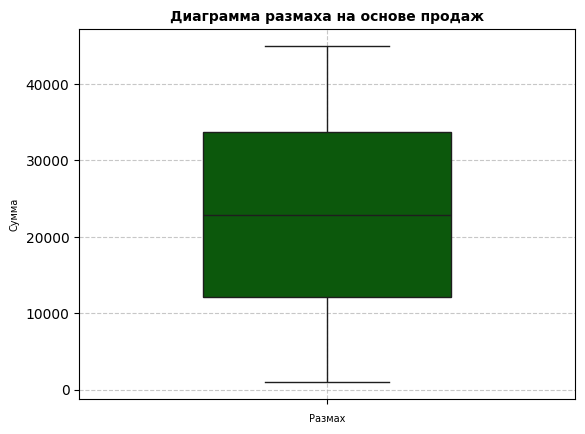

In [212]:
sns.boxplot(data=df, y='sales', color='darkgreen', width=0.5)

plt.xlabel('Размах', fontsize=7)
plt.ylabel('Сумма', fontsize=7)
plt.title('Диаграмма размаха на основе продаж', fontsize=10, weight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


На данной диаграме размаха визуализируется:
- Медианное значение (наиболее частровстречающееся) суммы заказа является 22882 руб
    
- Межквартильный размах составляет от 12135 до 33730 руб - диапазон сумм заказов, с которыми были совершены наибольшее число заказов 
    
- Заказ с максимальной суммой 44995 руб, с минимальной - 1002
    
- Значения которые выходят за 1.5 межквартильных размаха считаются выбросами (аномальными заказами по сумме продаж). **На данном графике отсутствуют**
    

In [217]:
mean = df['sales'].mean()
std_dev = df['sales'].std()

In [234]:
lower_bound_ = mean - 3 * std_dev
upper_bound_ = mean + 3 * std_dev

print(f"Нижняя граница (3 сигмы): {lower_bound_}")
print(f"Верхняя граница (3 сигмы): {upper_bound_}")

Нижняя граница (3 сигмы): -14884.241709201222
Верхняя граница (3 сигмы): 60727.757182262445


Если данные в колонке sales находятся за пределами этих границ, это может указывать на наличие значительных выбросов или аномалий. Такие выбросы могут быть результатом ошибок в данных, редких событий или особых условий, которые требуют дальнейшего анализа.

В данных отсутсвуют выбросы и аномалии, это подтверждено
- методом describe
- построением диаграммы размаха с отсутствием выбросов
- правилом 3 сигм с нахождением диапазона "нормальности"

#### Задание 3

##### Категоризация заказов по сумме

На основании отсутсвия аномальных сумм заказов, логично будет разделить заказы по перцентилям

In [235]:
df['sale_group'] = pd.qcut(df['sales'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [267]:
category_labels = {
    'Q1': 'Low Value',
    'Q2': 'Medium-Low Value',
    'Q3': 'Medium-High Value',
    'Q4': 'High Value'
}

df['sale_group'] = df['sale_group'].replace(category_labels)

In [237]:
df.order_category.value_counts()

order_category
Low Value            2450
Medium-Low Value     2450
Medium-High Value    2450
High Value           2450
Name: count, dtype: int64

In [238]:
df.sample(3)

Название столбца,id,order_date,class,region,sub_category,sales,order_category,sale_group
2406,6907,2018-05-20,Same Day,Урал,Binders,10437.660,Low Value,Low Value
6366,8206,2016-11-08,Same Day,Владивосток,Chairs,24271.600,Medium-High Value,Medium-High Value
9150,5736,2015-06-29,Стандарт,Владивосток,Binders,5727.898,Low Value,Low Value


Получено 4 группы с одинаковым количеством наблюдений 

##### Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу

In [258]:
df_benefit = df \
          .groupby(['region', 'sale_group'], observed=True)\
          .agg({'order_date': 'count', 'sales': 'sum'})\
          .sort_values('sales',ascending = False)\
          .rename(columns = {'order_date':'order_num'})

df_benefit

,Название столбца,order_num,sales
region,sale_group,,
Калиниград,High Value,756,2.981133e+07
Владивосток,High Value,718,2.823214e+07
Калиниград,Medium-High Value,807,2.280716e+07
Урал,High Value,559,2.194230e+07
Владивосток,Medium-High Value,683,1.939682e+07
Москва,High Value,417,1.633080e+07
Урал,Medium-High Value,559,1.587757e+07
Калиниград,Medium-Low Value,814,1.424274e+07
Владивосток,Medium-Low Value,669,1.168082e+07


In [259]:
df_benefit['avg_order_amount'] = df_benefit['sales'] / df_benefit['order_num']

In [260]:
df_benefit.sort_values('avg_order_amount',ascending = False,)

,Название столбца,order_num,sales,avg_order_amount
region,sale_group,,,
Калиниград,High Value,756,2.981133e+07,39432.981997
Владивосток,High Value,718,2.823214e+07,39320.533162
Урал,High Value,559,2.194230e+07,39252.768730
Москва,High Value,417,1.633080e+07,39162.600288
Урал,Medium-High Value,559,1.587757e+07,28403.531574
Владивосток,Medium-High Value,683,1.939682e+07,28399.437906
Калиниград,Medium-High Value,807,2.280716e+07,28261.664498
Москва,Medium-High Value,401,1.126251e+07,28086.052120
Урал,Medium-Low Value,579,1.018927e+07,17598.040708


Регионом с самой высокой средней суммой заказа являются Калининград
Самые недорогие заказы делают покупатели из москвы.
Урал и Москва делают меньшее число заказов, но с более высокими суммами, чем Калининград и Владивосток

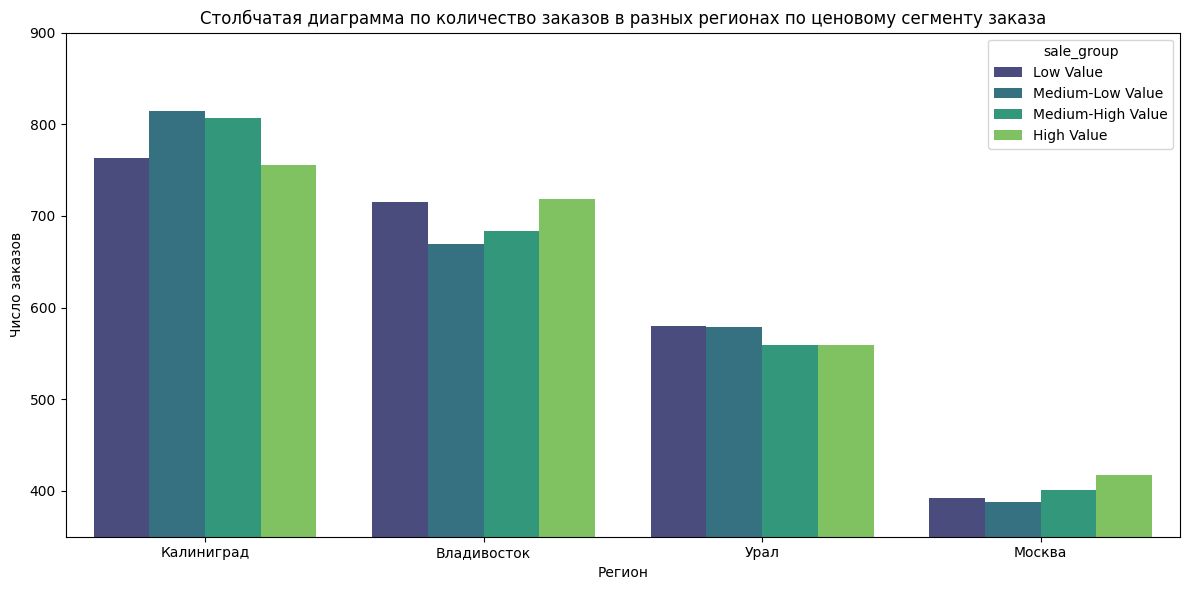

In [278]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_benefit, x='region', y='order_num', hue='sale_group', palette='viridis')

plt.title('Столбчатая диаграмма по количество заказов в разных регионах по ценовому сегменту заказа')
plt.xlabel('Регион')
plt.ylabel('Число заказов')
plt.ylim(350,900)

plt.tight_layout()
plt.show()

На данной столбчатой диаграмме отображено количество заказов по регионам
- У Москвы меньше всего заказов, у Калининграда - больше всего
- Во Владивостоке и Москве больше всего заказов сделано в категории "высокая стоимость заказа"
- В Калининграде преимущественно делаются заказы средней ценовой категории, а Во Владивостоке - низкой и высокой стоимости.
- На Урале цисло заказов разных ценовых категорий практически одинаковые

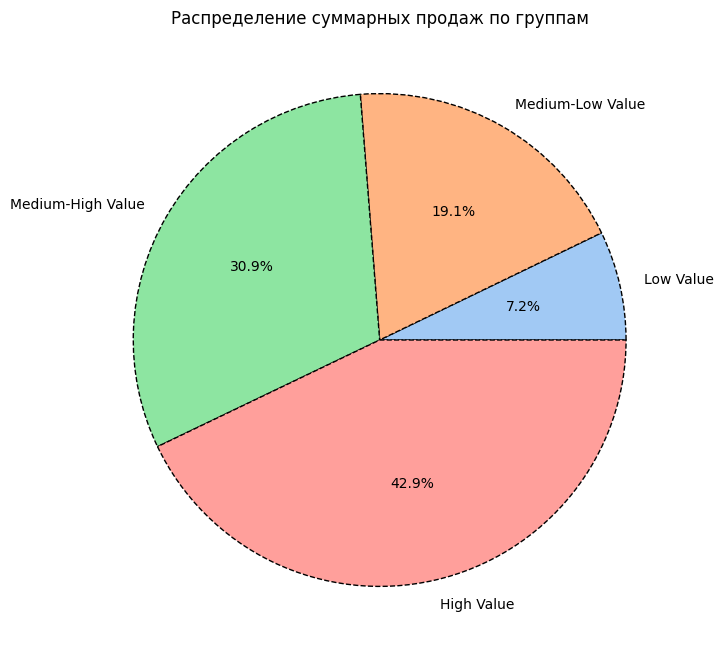

In [290]:
sales_by_group = df_benefit.groupby('sale_group', observed=True)['sales'].sum()


# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')  # Использование пастельной палитры из Seaborn
plt.pie(sales_by_group, labels=sales_by_group.index, autopct='%1.1f%%', colors=colors,wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
plt.title('Распределение суммарных продаж по группам')

# Показать график
plt.show()

На данной круговой диаграмме визуализируется, что 
- 43% прибыли исходит от заказов высокой стоимости
- 31% - средне-высокой стоимости
- 7% - низкой
- 19% средне-низкой

##### Проверка

In [291]:
if df['sales'].sum() == df_benefit['sales'].sum():
    print('Ок, нет потерь данных')
else:
    print('Error')

Ок, нет потерь данных


#### Финальный вывод по тестовому заданию

<div style="border:solid Purple 2px; padding: 40px">

- Был произведен онбординг с датасетом при помощи универсальный функции, которая выводит первые 5 строк таблицы, количество пропусков, дубликатов, информацию о размере, а так же о типе данных столбцов.
    
- Выполнена преобработка данных с приведением столбцво в змеиный регистр, корректировкой типов данных некоторых столбцов, перепроверкой на наличие явных и неявных дубликатов
    
- Найден ответ на первое задание- определены подкатегории товаров, которые покупали максимально часто за все время, за последние 2 года от исследуемых данных и за последний год. Во всех 3 временных интервалах субкатегории 'Binders', 'Paper', 'Furnishings', 'Phones', 'Storage' обладали наивысшим количеством заказов. Визуализация с помощью хитмэпа
    
- Построена визуализация (диаграмма размаха). На ней отображено - медианное значение суммы заказа является 22882 руб, межквартильный размах составляет от 12135 до 33730 руб - диапазон наиболее частовстречающихся сумм заказов , с которыми были совершены наибольшее число заказов, максимальная сумма заказа составила 44995 руб, с минимальная - 1002 руб, аномальных значений не обнаружено
    
- Проведена перепроверка данных на нормальность методом describe, построением диаграммы размаха (с отсутствием выбросов) и правилом 3 сигм с нахождением диапазона "нормальности"
    
- Из-за отсутсвтия аномалий данных было принято решения сегментации данных по величине суммы заказа по перцентилям. В итоге выделено 4 группы: с низкой, средней, средне-высокой и высокой стоимостью. В каждую группу вошло 2450 наблюдений.
    
- Произведена группировка по региону и ценовому сегменту заказа и сортировка по величине суммы заказа. Далее в исследуемый датафрейм добавлен столбец со средней суммой заказа и выделены следующие паттерны: регионами с самой высокой средней суммой заказа является Калининград. Урал и Москва делают меньшее число заказов, но с более высокими суммами, чем Калининград и Владивосток. Именно заказы из Владивостока и калининграда являются наиболее прибыльными для компании.

- На столбчатой диаграме отмечается, что больше всего заказов делает калининград и относятся он с категории средне-низкой и средне-высокой стоимости, Москва делает меньшего всего общее количество заказов, но там наибольший процент заказов высокой стоимости
    
-43% прибыли исходит от заказов высокой стоимости, 31% - средне-высокой стоимости, 7% - низкой, 19% средне-низкой


- Возможно, стоит провести определенные маркетинговые акции для привлечения клиентов именно из регионов Урал и Москва для повышения количества заказов, которые на основании исследуемых данных являются самыми крупными и приносят максимальное количество прибыли

- Возможно, при увеличении затрат на рекламные инвестиции в Урале и Москве получится увеличить количество заказов за счет привлечения новых пользователей или расширения аудитории покупателей 

- А в калиниграде и Владивостоке необходимо стимулировать клиентов на совершение более дорогих заказов за счет проведения маркетинговых кампаний
</div>
